In [253]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


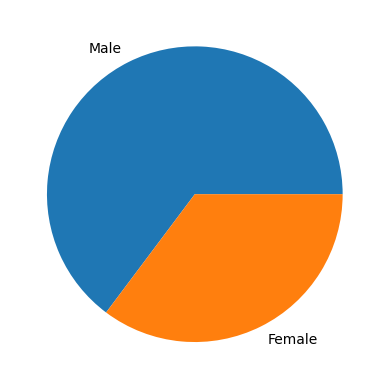

In [254]:
## sex - encoding
encoded_sex = pd.Series([1 if i == 'male' else 0 for i in data['Sex']]) # 간단한 파이썬 제네레이터를 통해 인코딩 방법
data['Sex'] = encoded_sex
sex_count = encoded_sex.value_counts(normalize= True) # 데이터프레임 내에서 각 수치의 빈도, 도는 비율을 계산해주는 함수. value_counts
plt.pie(sex_count, labels = ['Male', 'Female'])
plt.show()

In [255]:
## Cabin - encoding
processed_cabin = data['Cabin'].fillna('N').apply(lambda x : x[0])
encoded_cabin = processed_cabin.astype('category')
data['Cabin'] = encoded_cabin
data['Sex'] = encoded_sex

survival_data = data[data['Survived'] > 0]
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,C


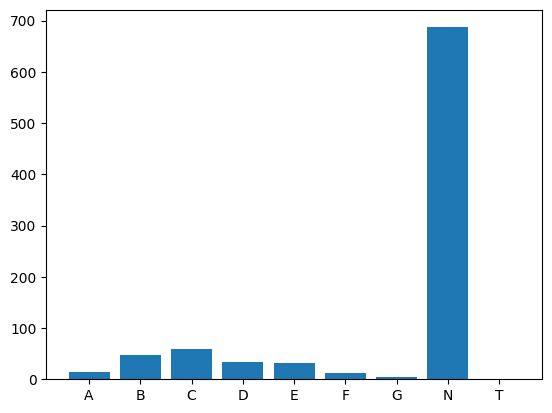

In [256]:
# 전체 인원에서의 객실별의 인원 비율
Cabin_count = data['Cabin'].value_counts().sort_index()
plt.bar(Cabin_count.index, Cabin_count.values)
plt.show()

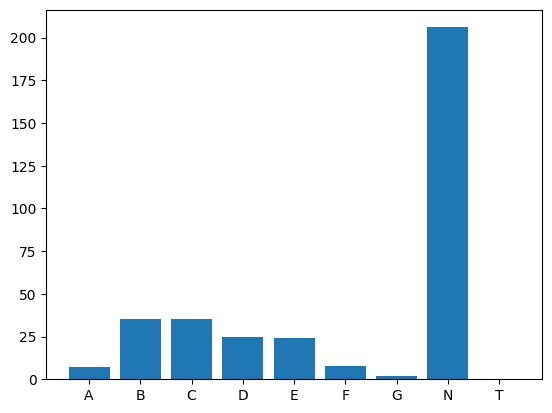

In [257]:
# 객실별 생존자의 수
cabin_survival_counts = data[data['Survived'] == 1]['Cabin'].value_counts(normalize=False).sort_index()
plt.bar(cabin_survival_counts.index, cabin_survival_counts.values)
plt.show()

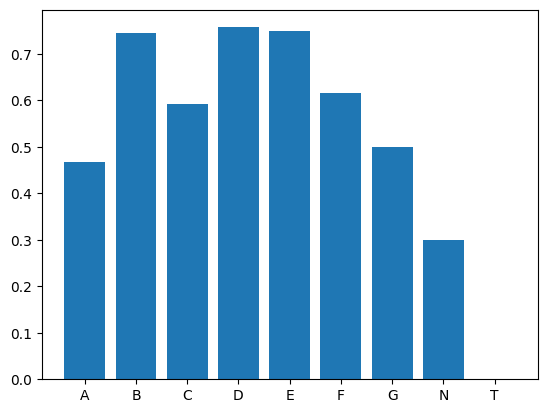

In [258]:
# 객실별 생존률
cabin_survival_ratio =  cabin_survival_counts / Cabin_count
plt.bar(cabin_survival_ratio.index, cabin_survival_ratio.values)
plt.show()
## 결론
# 객실 구역에 따른 어느정도의 생존률 차이가 있어 보이긴한다.

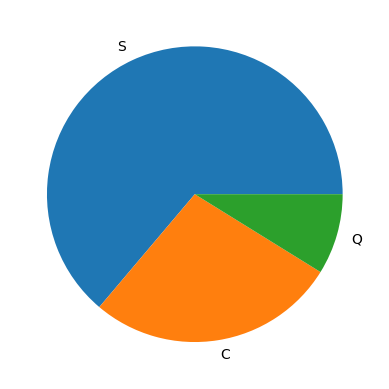

In [259]:
embarked = data[data['Survived'] == 1]['Embarked'].value_counts(normalize=False)
plt.pie(embarked, labels= ['S', 'C', 'Q'])
plt.show()

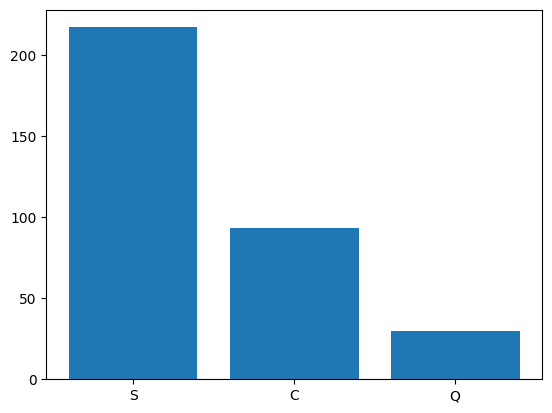

In [260]:
# S항구에서 탑승한 사람들은 유의마한 수치로 더 생존율이 높았다. 
plt.bar(embarked.index, embarked.values)
plt.show()

In [261]:
import re
def extract_title(name):
    title = re.search(r'\b(\w+)\.',name)
    return title.group(1)

Title = data['Name'].apply(extract_title)
data['Name'] = Title
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,N,S


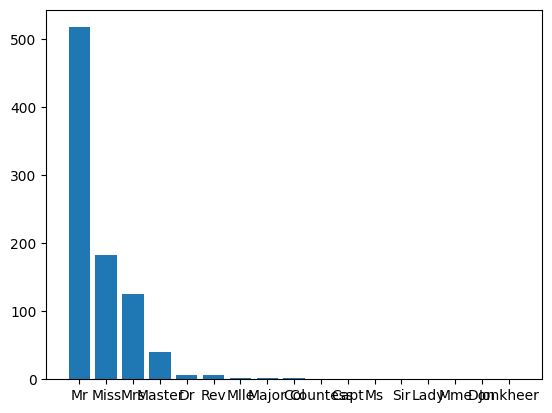

In [262]:
titles = data['Name'].value_counts()
plt.bar(titles.index, titles.values)
plt.show()

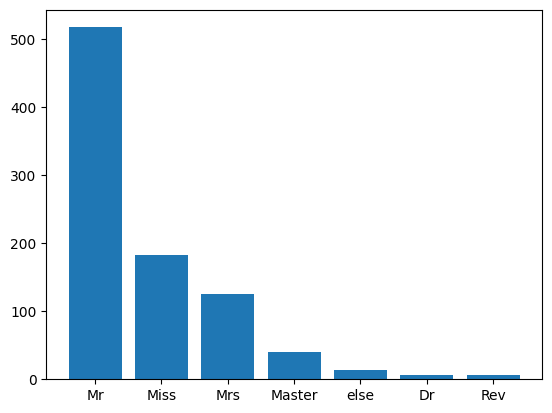

In [263]:
# rev 이하의 빈도를 가진 데이터는 모두다 else로 범주화
title_list = ['Mr', 'Miss', 'Mrs' ,'Master', 'Dr', 'Rev']
def else_categorization(name):
    return name if name in title_list else 'else'
name = data['Name'].apply(else_categorization)
titles_count = name.value_counts()
plt.bar(titles_count.index, titles_count.values)
plt.show()

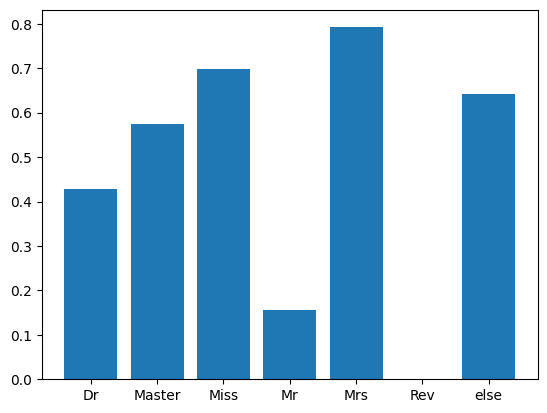

In [264]:
#위 범주화 된 데이터중들의 각각의 생존률을 구해서 나타내보자.
data['Name'] = name
survival_title_count = data[data['Survived'] == 1]['Name'].value_counts(normalize=False)
survival_ratios = survival_title_count / titles_count
plt.bar(survival_ratios.index, survival_ratios.values)
plt.show()
# 성인 남성은 대부분 현저히 낮은 생존률을 보여줬다. 이는 데이터 학습에 도음이 될것으로 판단된다.

In [265]:
# mr, miss, mrs, master, dr, rev 외에는 그 수치가 매우적음으로 이를 고려하여서 매핑하겠다.
title_list = ['Mr', 'Miss', 'Mrs' ,'Master', 'Dr', 'Rev']
title_dict = {
    'Mr' : 1, 
    'Miss' : 2, 
    'Mrs' : 3,
    'Master' : 4, 
    'Dr' : 5, 
    'Rev' : 6
}
def encode_title(title):
    if title in title_list:
        return title_dict[title]
    else:
        return 0

encode_name = data['Name'].apply(encode_title)
data['Name'] = encode_name
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,1,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,3,0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,2,0,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,3,0,35.0,1,0,113803,53.1000,C,S
4,5,0,3,1,1,35.0,0,0,373450,8.0500,N,S


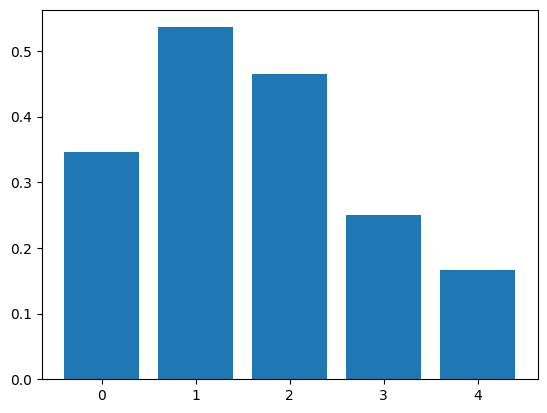

In [266]:
## SibSp : 형제, 자매, 배우자
## Parch : 자식
## family size : SibSp + Parch
sibsp_survival_count = data[data['Survived'] == 1]['SibSp'].value_counts()
sibsp_count = data['SibSp'].value_counts()
sibsp_survival_ratio = sibsp_survival_count / sibsp_count
plt.bar(sibsp_survival_ratio.index, sibsp_survival_ratio.values)
plt.show()
# 형제자식이 있는자가 생존률에 크게 관련이 있어보이지는 않는다.

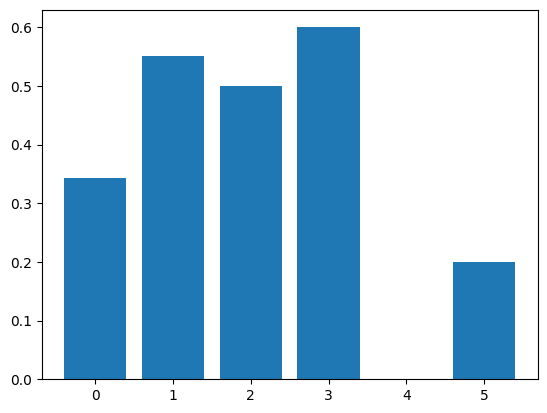

In [267]:
## Parch : 자식
Parch_survival_count = data[data['Survived'] == 1]['Parch'].value_counts()
Parch_count = data['Parch'].value_counts()
Parch_survival_ratio = Parch_survival_count / Parch_count
plt.bar(Parch_survival_ratio.index, Parch_survival_ratio.values)
plt.show()

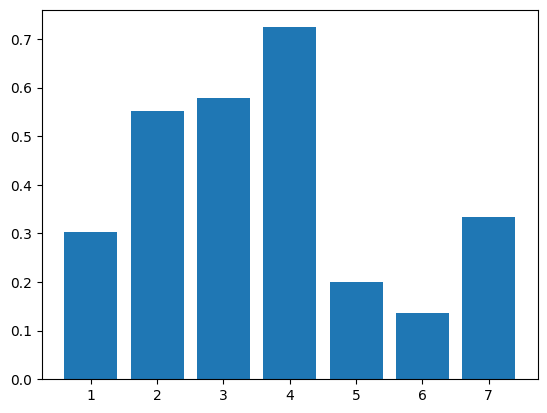

In [268]:
## family size : SibSp + Parch
family = data['Parch'] + data['SibSp'] + 1
data['Family'] = family
family_survival_count = data[data['Survived'] == 1]['Family'].value_counts()
family_count = family.value_counts()
family_survival_ratio = family_survival_count / family_count
plt.bar(family_survival_ratio.index, family_survival_ratio.values)
plt.show()
# 히안하게도 가족구성원수가 4명인 사람의 생존률이 가장 높았다. 

In [269]:
### 결론
# id, cabin은 모델데이터 활용때 쓰지 않을 예정이다.
# Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare , Embarked, Family 이 데이터들을 활용할것이다. 마지막으로 이 데이터들의 상관계수를 더 확인해보긴 할것이다.

# age 
# 결측값을 제거한 버전으로도 모델링 vs 결측치를 평균값으로 메꾼 값으로도 모델링 바교
# cabin
# 결측값을 제거한 버전으로 모델링 vs 결측치를 또다른 카테고리 N으로 메운뒤 모델링 비교